# 9.2. Алгоритм KMeans

На лекции вам была предложена реализация k-means "руками", без применения библиотечных реализаций. Но эта реализация была предложена исключительно для двумерных векторов. Ваша задача - написать класс `KMeans`, в рамках которого должны быть реализованы следующие функции:

* `.fit(X, n_clusters)` - функция вычисления оптимальных центров кластеров, соответствующих логике алгоритма KMeans
* `.predict(X)` - функция кластеризации объектов из выборки `X`

Конструктор класса `KMeans` должен принимать 2 аргумента:
* `K` - количество кластеров
* `init` - аргумент, принимающий массив размерности $K × M$, где $M$ - размерность векторов признаковых описаний объектов, а $K$ - число кластеров, содержащий координаты исходным приближений центров кластеров

Алгоритм не должен содержать элементов готовых решений из любых библиотек, пользоваться можно только библиотеками `numpy` и `collections`. В качестве метрики используйте обычное [евклидово расстояние](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=9M9zA6jeFDfb).

В качестве критерия останова алгоритма можно использовать следующее утверждение: *алгоритм кластеризации сходится (останавливается), когда изменение центров кластеров на очередной итерации алгоритма незначительно. Т.е. **все попарные расстояния между обновлёнными и предшествующими значениями центров кластеров на очередной итерации не превосходят некоторого маленького числа (в нашем случае рассмотрим 0.001)**.*

В математических терминах это можно записать так. Пусть $\vec{C^i_1}, \vec{C^i_2}, ... \vec{C^i_K}$ - центры кластеров, полученные на итерации алгоритма с номером $i$, а $\vec{C^{i-1}_1}, \vec{C^{i-1}_2}, ... \vec{C^{i-1}_K}$ - центры кластеров, полученные на предыдущей итерации с номером $i-1$. Тогда алгоритм кластеризации завершится после итерации i, если:

$$max\left(||\vec{C^i_1}-\vec{C^{i-1}_1}||, ||\vec{C^i_2}-\vec{C^{i-1}_2}||, ... ||\vec{C^i_K}-\vec{C^{i-1}_K}||\right)\leq0.001$$

Шаблон класса:

In [444]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [445]:
import numpy as np
from collections import defaultdict

class KMeans:
    def __init__(self, K, init):
        """
        Инициализация KMeans.

        Параметры:
        K: int - количество кластеров
        init: np.array - массив размерности (K, M), содержащий начальные центры кластеров
        """
        self.K = K
        self.centroids = np.array(init)  # начальные центры кластеров
    
    def euclidean_distance(self, a, b):
        """
        Рассчитывает евклидово расстояние между двумя точками.
        """
        return np.sqrt(np.sum((a - b) ** 2))

    def fit(self, X):
        """
        Вычисляет оптимальные центры кластеров методом KMeans.

        Параметры:
        X: np.array - массив данных размерности (N, M), где N - количество точек, M - размерность признаков
        """
        X = np.array(X)
        prev_centroids = np.zeros_like(self.centroids)  # Для хранения предыдущих центров
        while True:
            # Шаг 1: Назначаем точки к ближайшему центру кластера
            clusters = defaultdict(list)
            for point in X:
                distances = [self.euclidean_distance(point, centroid) for centroid in self.centroids]
                cluster_index = np.argmin(distances)
                clusters[cluster_index].append(point)

            self.clusters = clusters

            # Шаг 2: Обновляем центры кластеров как средние значения
            for k in range(self.K):
                if clusters[k]:  # Если в кластере есть точки
                    self.centroids[k] = np.mean(clusters[k], axis=0)

            # Шаг 3: Проверяем критерий сходимости
            shifts = [self.euclidean_distance(self.centroids[i], prev_centroids[i]) for i in range(self.K)]
            if max(shifts) < 0.001:
                break
            prev_centroids = self.centroids.copy()

    def predict(self, X):
        """
        Назначает каждую точку из X к ближайшему кластеру.

        Параметры:
        X: np.array - массив данных размерности (N, M), где N - количество точек, M - размерность признаков

        Возвращает:
        labels: list - список меток кластеров для каждой точки
        """
        X = np.array(X)
        labels = []
        for point in X:
            distances = [self.euclidean_distance(point, centroid) for centroid in self.centroids]
            cluster_index = np.argmin(distances)
            labels.append(cluster_index)
        return labels


## Пример входных данных

В данном случае имеется в виду только формат данных. Гарантируется, что в данных будут выделенные кластеры.

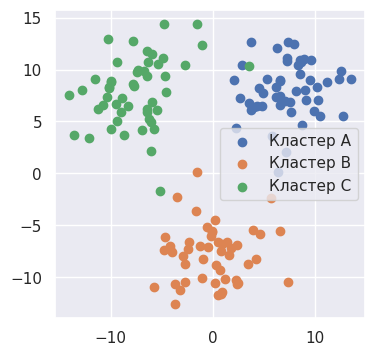

In [446]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme()

# Генерация случайных данных для трех кластеров
np.random.seed(42)

a_data = {
    'x': 3.0 * np.random.randn(50) + 8,
    'y': 3.0 * np.random.randn(50) + 8
}
b_data = {
    'x': 3.0 * np.random.randn(50),
    'y': 3.0 * np.random.randn(50) - 8
}
c_data = {
    'x': 3.0 * np.random.randn(50) - 8,
    'y': 3.0 * np.random.randn(50) + 8
}


plt.figure(figsize=(4, 4))

plt.scatter(a_data['x'], a_data['y'], label='Кластер A')
plt.scatter(b_data['x'], b_data['y'], label='Кластер B')
plt.scatter(c_data['x'], c_data['y'], label='Кластер C')

plt.legend()



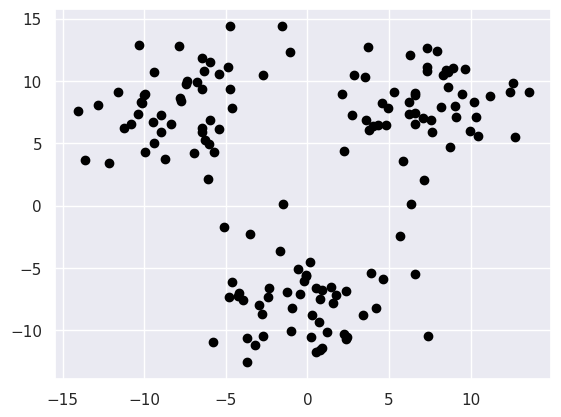

In [447]:
# Создание списка точек
points = [
    [a_data['x'][i], a_data['y'][i]] for i in range(len(a_data['x']))
] + [
    [b_data['x'][i], b_data['y'][i]] for i in range(len(b_data['x']))
] + [
    [c_data['x'][i], c_data['y'][i]] for i in range(len(c_data['x']))
]

for point in points:
    Point(point).plot("black")
plt.show()

In [448]:
centers = [
    [-15, -15],
    [15, 0],
    [0, 15]
]
kmeans = KMeans(3, centers)
kmeans.fit(points)

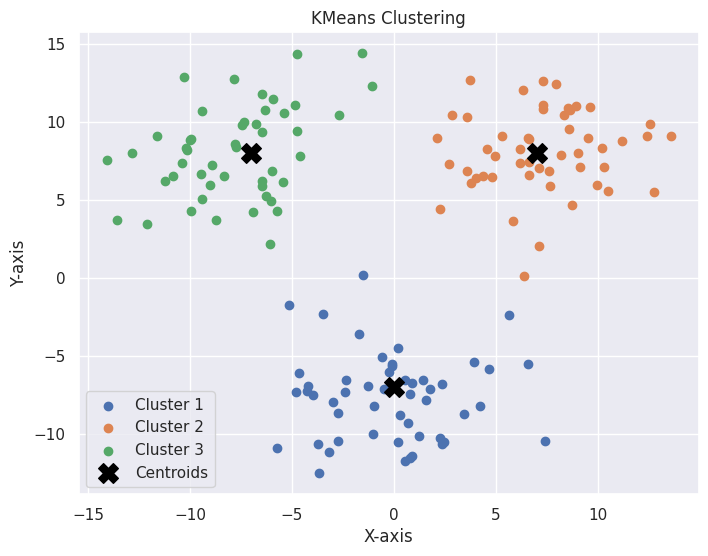

In [449]:
labels = kmeans.predict(points)

# Визуализируем результаты
plt.figure(figsize=(8, 6))

# Отображаем точки, окрашенные по кластерам
for i in range(kmeans.K):
    cluster_points = np.array(kmeans.clusters[i])
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i + 1}")

# Отображаем центры кластеров
centroids = np.array(kmeans.centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='black', label='Centroids')

plt.title("KMeans Clustering")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.show()

In [450]:

M = 2
N = 4
# X = np.random.randn(N, M)
X = np.array([[0, 0], [0, 70], [100, 0], [100, 50]])
X

array([[  0,   0],
       [  0,  70],
       [100,   0],
       [100,  50]])

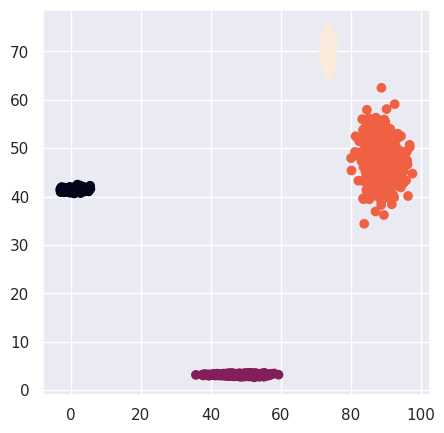

In [451]:
data = pd.read_csv('Task_10/2.csv', index_col=None)
columns = list(data.columns)
plt.figure(figsize=(5,5))
plt.scatter(data[columns[0]], data[columns[1]], c=data[columns[2]])
plt.show()

X_fit = data[[columns[0], columns[1]]]
X_fit = np.array(X_fit)
# print(X_fit)
kmeans = KMeans(N, X).fit(X_fit)


In [452]:
print(kmeans.K)
print(kmeans.centers)
for i, center in kmeans.centers.items():
            plt.scatter(center[0], center[1], label=f'Center {i}', s=100, edgecolors='black', marker='X')

AttributeError: 'NoneType' object has no attribute 'K'

In [128]:
kmeans = KMeans(N, X)
print(kmeans)

{1: array([0, 0]), 2: array([ 0, 70]), 3: array([100,   0]), 4: array([100,  50])}


## Примечания

1. Иногда при сдаче решения в системе Яндекс. Контест может возникать ошибка TL. Она обычно возникает либо из-за внутренних задержек тестирующей системы, либо из-за недостаточно быстрого решения. В первом случае можно попробовать отправить решение снова (при этом стоит добавить в начало или конец программы строчку с ключевым словом pass - оно не влияет на логику работы программы, но позволяет повторно загрузить одинаковое решение в систему). Во втором случае нужно попытаться оптимизировать программу - понять, в каких фрагментах программа может работать медленно. Здесь рекомендуем обратить внимание на содержание циклов (в частности, проверьте, что в программе нигде не может возникнуть бесконечных циклов, которые никогда не завершаются).

2. В predict нужно возвращать объект типа numpy.array(), а не классический Python list.

3. Обратите внимание, что в задачах кластеризации в функции fit и predict можно подавать одинаковые наборы данных. Но на стадии fit мы осуществляем обучение, подбирая центры кластеров на основании входных данных. А в predict мы предсказываем метки кластеров уже на основании найденных центров кластеров.